The increase interest for cryptocurrencies is undeniable and while many so called experts on youtube & twitter claim, with conviction, that their readings and interpretations of the markets is infallible we will attempt to generate color coded charts of crypto currencies prices with the help of Pearson correlations & RSI, Relative Strength Indicator.

The color of the line plos can reveal changes in trend, strength or exhaustion of an actual trend. 
Using colors allow the user looking at chart to quickly interpret how price develops with the conditions of an underlying indicator.


RSI typically measured over a 14-day period, fluctuate between zero and 100. The Relative Strength Index indicates oversold market conditions when below 30 and overbought market conditions when above 70. It is frequently used by swing traders. They look for signals of waning or strengthening momentum in short to intermediate term price movements within a market. Overbought or oversold conditions often immediately precede short-term trend changes that present trading opportunities.
(Source: corporatefinanceinstitute.com)

While MFI is  a movement indicator that analyzes the buying or selling pressure of a given asset.

The last part explores how the correlation between two cryptocurrencies we choose evolves over time.

Installing required packages

In [ ]:
pip install Historic_Crypto

In [ ]:
pip install scipy

Packages & modules

In [4]:
from Historic_Crypto import HistoricalData
from scipy.stats import pearsonr
from matplotlib import cm

import matplotlib.pyplot as plt
import matplotlib.colors as col
import numpy as np
import pandas as pd 

Collecting data from Coinbase API

In [8]:
#We want to collect 1 Hour data so we set frequency = 3600 since the start 2017

frequency = 3600
from_date = '2017-01-01-00-00'

#Cryptos
cryptos_list = ['BTC-USD', 'ETH-USD']

#Querying the data 

for i in range(len(cryptos_list)):
    coin_name = cryptos_list[i]
    price_data = HistoricalData(coin_name, frequency, from_date).retrieve_data()
    price_DF = price_data[["close", "low", "high"]]
    if i == 0:
        DF = pd.DataFrame(price_DF.copy())
    else:
        DF = pd.merge(left= DF, right = price_DF, how = "left", left_index=True, right_index= True)
    
    DF.rename(columns={"close": "close - " + coin_name}, inplace = True)
    DF.rename(columns={"low": "low - " + coin_name}, inplace = True)
    DF.rename(columns={"high": "high - " + coin_name}, inplace = True)
DF.head()


Checking input parameters are in the correct format.
Formatting Dates.
Checking if user supplied is available on the CoinBase Pro API.
Connected to the CoinBase Pro API.
Ticker 'BTC-USD' found at the CoinBase Pro API, continuing to extraction.
Provisional Start: 2017-01-01T00:00:00
Provisional End: 2017-01-13T12:00:00
Data for chunk 1 of 158 extracted
Provisional Start: 2017-01-13T12:00:00
Provisional End: 2017-01-26T00:00:00
Data for chunk 2 of 158 extracted
Provisional Start: 2017-01-26T00:00:00
Provisional End: 2017-02-07T12:00:00
Data for chunk 3 of 158 extracted
Provisional Start: 2017-02-07T12:00:00
Provisional End: 2017-02-20T00:00:00
Data for chunk 4 of 158 extracted
Provisional Start: 2017-02-20T00:00:00
Provisional End: 2017-03-04T12:00:00
Data for chunk 5 of 158 extracted
Provisional Start: 2017-03-04T12:00:00
Provisional End: 2017-03-17T00:00:00
Data for chunk 6 of 158 extracted
Provisional Start: 2017-03-17T00:00:00
Provisional End: 2017-03-29T12:00:00
Data for chunk 7 of 

,close - BTC-USD,low - BTC-USD,high - BTC-USD,close - ETH-USD,low - ETH-USD,high - ETH-USD
time,,,,,,
2017-01-01 01:00:00,970.49,968.21,972.00,8.30,8.25,8.30
2017-01-01 02:00:00,967.95,967.00,971.99,8.47,8.30,8.53
2017-01-01 03:00:00,968.14,967.57,969.47,8.59,8.45,8.60
2017-01-01 04:00:00,968.10,966.64,968.62,8.53,8.49,8.60
2017-01-01 05:00:00,966.92,964.37,968.10,8.38,8.34,8.54


In [10]:
#Saving the DF from Jan 2017 to May 19 2022 in order to have a faster code next times.
DF.to_csv('crypto_prices_Jan2017-May192022.csv')

DF.tail()

In [ ]:
Price Charts

Text(0.02, 0.9, 'ETH-USD')

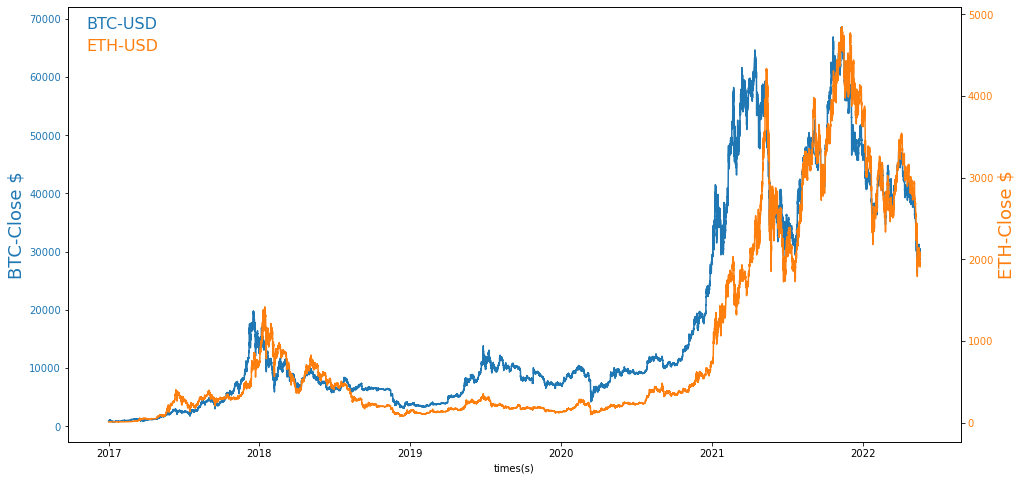

In [15]:
x = DF.index
fig, ax1 = plt.subplots(figsize = (16,8), sharex=False)

#BTC-USD Chart
color = 'tab:blue'
y = DF['close - BTC-USD']
ax1.set_xlabel('times(s)')
ax1.set_ylabel('BTC-Close $', color = color , fontsize = 18)
ax1.plot(x, y, color = color)
ax1.tick_params(axis ='y', labelcolor = color)
ax1.text(0.02, 0.95, 'BTC-USD', transform = ax1.transAxes, color = color , fontsize = 16)

#ETH-USD Chart

color = 'tab:orange'
y = DF['close - ETH-USD']

ax2 = ax1.twinx()

ax2.set_xlabel('times(s)')
ax2.set_ylabel('ETH-Close $', color = color, fontsize = 18)
ax2.plot(x, y, color = color)
ax2.tick_params(axis='y', labelcolor = color)
ax2.text(0.02, 0.9, 'ETH-USD', transform = ax2.transAxes, color = color, fontsize = 16)

Combining RSI + Pearson Correlation with our Chart.

In [19]:
def indicators(DF):

    #30 Days Pearson Correlation
    corr_period = 30
    columntoadd = [0] * corr_period

    DF = DF.fillna(0)
    for i in range(len(DF) - corr_period):
        btc = DF['close - BTC-USD'][i:i + corr_period]
        eth = DF['close - ETH-USD'][i:i + corr_period]
        corr,_ = pearsonr(btc, eth)
        columntoadd.append(corr)
    
    #Incorporating the colours into our original Dataframe
    DF.insert(2, "Pearson_Corr", columntoadd, True)

    # Moving averages for RSI => Calculating moving averages on high lows and standard deviation on different periods
    # Calculations to be added to DF

    DF['M_A_200_low'] = DF['low - BTC-USD'].rolling(window = 200).min()
    DF['M_A_14_low'] = DF['low - BTC-USD'].rolling(window = 14).min()
    DF['M_A_200_high'] = DF['high - BTC-USD'].rolling(window = 200).max()
    DF['M_A_14_high'] = DF['high - BTC-USD'].rolling(window = 14).max()

    # RSI
    DF['K-ratio'] = 100*((DF['close - BTC-USD'] - DF['M_A_14_low']) / (DF['M_A_14_high'] - DF['M_A_14_low']))
    DF['RSI'] = DF['K-ratio'].rolling(window = 3).mean()

    DF.fillna(0, inplace= True)
    return DF

DFind = indicators(DF)


Visualizing both indicators, Pearson Corr & RSI

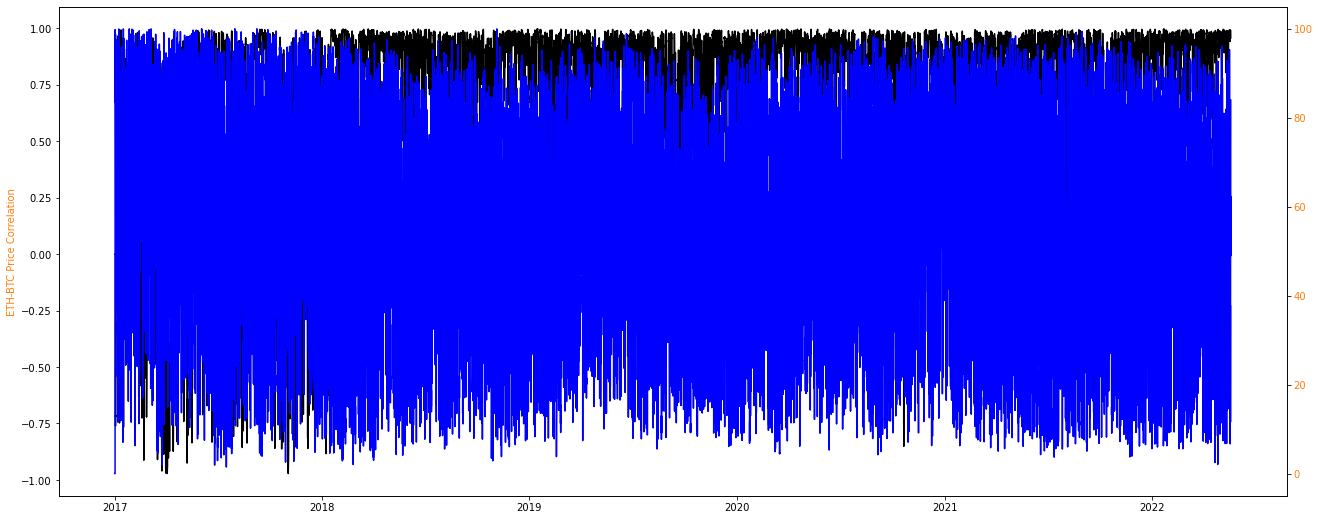

In [22]:
fig, ax1 = plt.subplots(figsize = (22,9), sharex = False)
plt.ylabel('ETH-BTC Price Correlation', color = color)

x = y = DFind.index

ax1.plot(x,DFind['Pearson_Corr'], color = 'black')
ax2 = ax1.twinx()
ax2.plot(x, DFind['RSI'], color = 'blue')

plt.tick_params(axis='y', labelcolor = color)
plt.show()

Converting Indicators into Color Values 

In [24]:
def get_colors(ind, colormap):
    colorlist = []
    norm = col.Normalize(vmin=ind.min(), vmax = ind.max())
    for i in ind:
        colorlist.append(list(colormap(norm(i))))
    return colorlist

#Converting RSI for our chart
y = np.array(DFind['RSI'])
colormap = plt.get_cmap('plasma')
DFind['RSI_colors'] = get_colors(y, colormap)
#Converting Pearson Correlation for our chart
y = np.array(DFind['Pearson_Corr'])
colormap = plt.get_cmap('plasma')
DFind['Corr_colors'] = get_colors(y, colormap)

Coloring the BTC Chart with RSI data

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

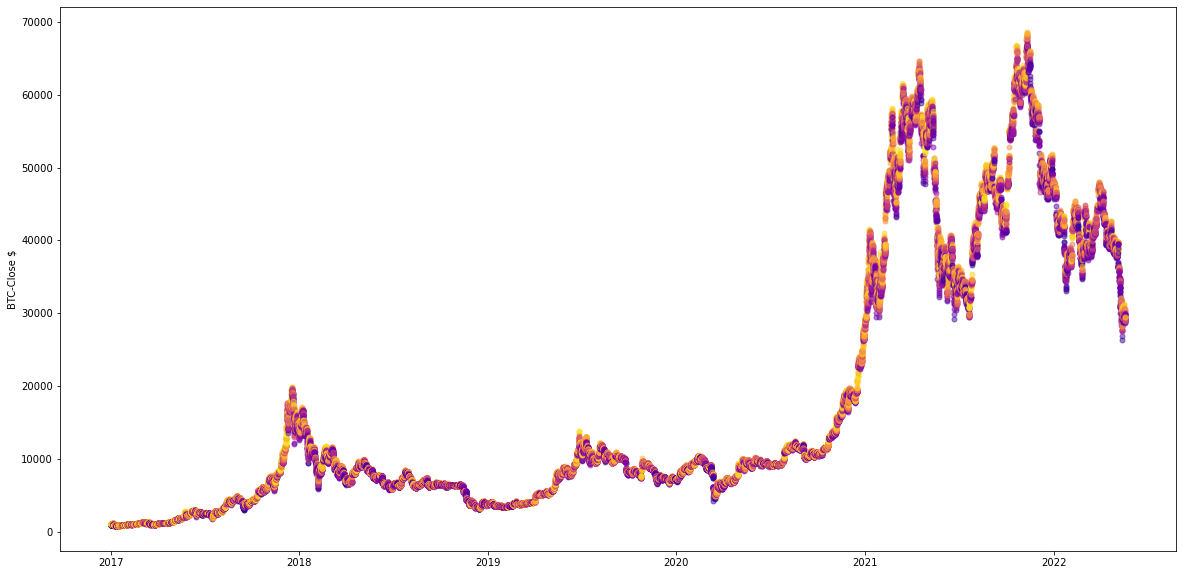

In [28]:
pd.plotting.register_matplotlib_converters()
fig, ax1 = plt.subplots(figsize = (20,10), sharex=False)
x = DFind.index
y = DFind['close - BTC-USD']
z = DFind['RSI_colors']

#Drawing points

for i in range(len(DFind)):
    ax1.plot(x[i], np.array(y[i]), 'o', color = z[i], alpha = 0.5, markersize = 5 )
ax1.set_ylabel('BTC-Close $')
ax1.tick_params(axis = y, labelcolor = 'black')
ax1.set_xlabel('Date')

ax1.text(0.02, 0.95, 'BTC-USD with RSI as colored Dots', transform = ax1.transAxes, fontsize = 16)
pngc = ax2.imshow(list(z), cmap = 'plasma', vmin = 0, vmax = 100, interpolation = 'none')
rsi_colored_chart = plt.colorbar(pngc) 